# STAT 301 Project Planning Stage

In [1]:
#importing necessary libraries
library(tidyverse)
library(ggplot2)
library(dplyr)     
library(car) 
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### Data Description

The Sleep Health and Lifestyle Dataset contains 374 observations and 13 variables, covering sleep quality, daily activity, stress, and cardiovascular health. It includes numerical and categorical data, such as sleep duration (hours), self-reported sleep quality (1-10 scale), physical activity level (minutes/day), stress level (1-10 scale), BMI category, and presence of sleep disorders (None, Insomnia, Sleep Apnea). This dataset helps analyze the relationship between lifestyle choices and sleep health.

| Variable | Type of Variable | Description |
| -------- | --------------- | ----------- |
| Person ID | Categorical | Unique identifier for each individual |
| Gender | Categorical | Gender of the individual (Male/Female) |
| Age | Numeric | Age of the individual in years |
| Occupation | Categorical | Job or profession of the individual |
| Sleep Duration | Numeric | Number of hours a person sleep per day |
| Quality of Sleep | Numeric | Subjective sleep quality rating (1-10) |
| Physical Activity Level | Numeric | Minutes of physical activity of an individual per day |
| Stress Level | Numeric | Subjective stress level of a person (1-10) |
| BMI Category | Categorical | BMI classification (Underweight, Normal, Overweight) |
| Blood Pressure  | Numeric | The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| Heart Rate | Numeric | Resting heart rate in beats per minute |
| Daily Steps | Numeric | Number of steps taken per day |
| Sleep Disorder | Categorical | Presence of a sleep disorder (None, Insomnia, Sleep Apnea) |

**Dataset used:** Laksika Tharmalingam. 2024. Sleep Health and Lifestyle Dataset. Retrieved from https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

### Question

a) How does sleep duration (hours) relate to other variables in the dataset? Specifically what is the relationship between sleep duration and factors such as stress level, physical activity, BMI category, age, gender, diet quality, and caffeine intake?

b) This question is focused on inference because the goal is to understand how other variables in the dataset . Rather than predicting sleep duration for individuals, we aim to analyze the relationships between these variables and determine their impact on sleep patterns. By examining the model’s coefficients, we can interpret how each factor contributes to changes in sleep duration, providing insights into potential lifestyle adjustments for better sleep health.

### Exploratory Data Analysis and Visualization

In [2]:
library(readr)

url <- "https://raw.githubusercontent.com/Aarush-agarwal/stat_301_proj/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv" 
sleep_df <- read_csv(url)
head(sleep_df)

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Here is a brief summary of the data

In [3]:
summary(sleep_df)

   Person ID         Gender               Age         Occupation       
 Min.   :  1.00   Length:374         Min.   :27.00   Length:374        
 1st Qu.: 94.25   Class :character   1st Qu.:35.25   Class :character  
 Median :187.50   Mode  :character   Median :43.00   Mode  :character  
 Mean   :187.50                      Mean   :42.18                     
 3rd Qu.:280.75                      3rd Qu.:50.00                     
 Max.   :374.00                      Max.   :59.00                     
 Sleep Duration  Quality of Sleep Physical Activity Level  Stress Level  
 Min.   :5.800   Min.   :4.000    Min.   :30.00           Min.   :3.000  
 1st Qu.:6.400   1st Qu.:6.000    1st Qu.:45.00           1st Qu.:4.000  
 Median :7.200   Median :7.000    Median :60.00           Median :5.000  
 Mean   :7.132   Mean   :7.313    Mean   :59.17           Mean   :5.385  
 3rd Qu.:7.800   3rd Qu.:8.000    3rd Qu.:75.00           3rd Qu.:7.000  
 Max.   :8.500   Max.   :9.000    Max.   :90.00     

The dataset is now successfully loaded into R. Moving on to cleaning and wrangling data.

Now we separate Blood.Pressure to create two distinct columns for systolic and diastolic values, making them easier to analyze. 
Also, We drop Person.ID because it's just an identifier with no predictive value for the model.

In [4]:
colnames(sleep_df) <- make.names(colnames(sleep_df))
sleep_df$BMI.Category <- as.factor(sleep_df$BMI.Category)
sleep_df <- sleep_df %>%
  separate(Blood.Pressure, into = c("Systolic_BP", "Diastolic_BP"), sep = "/", convert = TRUE) 
sleep_df <- sleep_df %>%
  select(-Person.ID)

head(sleep_df)

Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Systolic_BP,Diastolic_BP,Heart.Rate,Daily.Steps,Sleep.Disorder
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<dbl>,<dbl>,<chr>
Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,None
Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
Male,28,Software Engineer,5.9,4,30,8,Obese,140,90,85,3000,Insomnia


To explore the question to determine whether higher stress levels are associated with shorter sleep durations and if physical activity mitigates this effect and how BMI interacts with this relationship, I chose a scatterplot as it will allow visualization of continuous relationships between sleep duration and stress levels and can explore a third variable by adding color. I can also use facets for BMI categories.

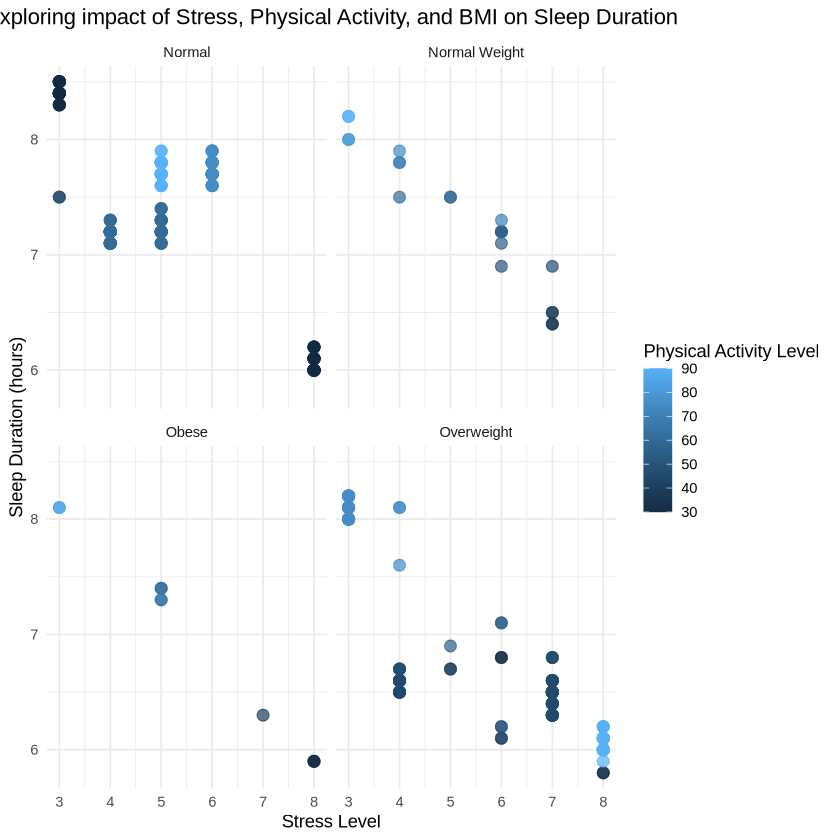

In [5]:
plot <- ggplot(sleep_df, aes(x = Stress.Level, y = Sleep.Duration, color = Physical.Activity.Level)) +
  geom_point(size = 3, alpha = 0.7) +                     
  facet_wrap(~ BMI.Category) +                             
  labs(title = "Exploring impact of Stress, Physical Activity, and BMI on Sleep Duration",
       x = "Stress Level",
       y = "Sleep Duration (hours)",
       color = "Physical Activity Level") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

plot

From this visualization, we can see that higher physical activity often corresponds to longer sleep duration across all BMI categories. Also, increasing stress levels generally results in lower sleep duration, especially for the Normal and Overweight groups. The Obese category tends to show shorter sleep durations regardless of stress level, suggesting that BMI may further moderate how stress and physical activity interact to affect sleep. The visualization suggests that these factors may indeed interact to influence sleep, making them appropriate variables to include in the analysis. In particular, the differences across BMI categories, and the way physical activity and stress seem to correlate with sleep duration, indicate that these variables can provide meaningful insights into the research question.

### Methods and Plan

To analyze how various factors influence sleep duration, I propose using Multiple Linear Regression (MLR). This model will help quantify the relationship between sleep duration and multiple lifestyle variables, such as stress level, physical activity, BMI category, age, gender, heart rate, and daily steps.

This method is appropriate because it:

- Allows us to measure how each factor contributes to sleep duration while controlling for others.
- Identifies significant predictors that impact sleep patterns.
- Helps determine whether lifestyle modifications (e.g., reducing stress, increasing activity) may be associated with better sleep.

Assumptions (LINE):

- Linear relationship exists between sleep duration and predictors (e.g., stress level, activity level).
- Independent observations (each individual's sleep data is separate).
- Normally distributed residuals (checked via diagnostic plots).
- Equal variance of residuals (homoscedasticity).

Limitations: 

- Correlation does not imply causation—MLR can only show associations.
- The model's accuracy depends on selecting relevant predictors.
- Sensitive to outliers (e.g., extreme stress levels or unusual sleep patterns).

### Computational Code and Output

Start:  AIC=-166.06
Sleep.Duration ~ 1

                          Df Sum of Sq     RSS     AIC
+ Quality.of.Sleep         1   184.201  51.934 -726.53
+ Stress.Level             1   155.320  80.815 -561.15
+ Heart.Rate               1    62.983 173.152 -276.16
+ Occupation              10    85.563 150.571 -275.11
+ Sleep.Disorder           2    34.662 201.473 -213.58
+ Age                      1    28.059 208.076 -207.45
+ BMI.Category             3    33.883 202.252 -206.22
+ Physical.Activity.Level  1    10.649 225.486 -177.39
+ Systolic_BP              1     7.685 228.450 -172.51
+ Diastolic_BP             1     6.552 229.583 -170.66
<none>                                 236.135 -166.06
+ Gender                   1     3.490 232.645 -165.71
+ Daily.Steps              1     0.369 235.766 -160.72

Step:  AIC=-726.53
Sleep.Duration ~ Quality.of.Sleep

                          Df Sum of Sq     RSS     AIC
+ Occupation              10    16.343  35.592 -808.61
+ Gender                 

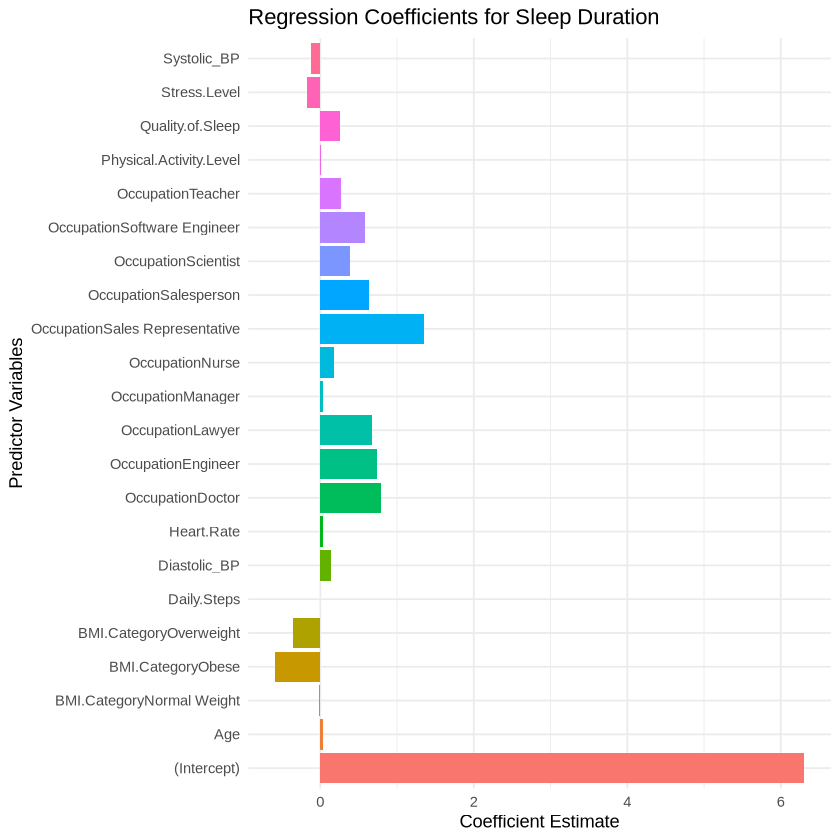

In [6]:
full_model <- lm(Sleep.Duration ~ ., data = sleep_df) 
null_model <- lm(Sleep.Duration ~ 1, data = sleep_df)  
n <- nrow(sleep_df)  
selected_model <- step(null_model, 
                       scope = list(lower = null_model, upper = full_model), 
                       direction = "both", 
                       trace = TRUE, 
                       k = log(n))

final_model <- lm(formula(selected_model), data = sleep_df)

tidy_final <- tidy(final_model)

ggplot(tidy_final, aes(x = term, y = estimate, fill = term)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  labs(title = "Regression Coefficients for Sleep Duration",
       x = "Predictor Variables",
       y = "Coefficient Estimate") +
  theme_minimal()


The stepwise regression model selected key predictors of sleep duration, with occupation and BMI category showing the strongest associations. Sales-related occupations had large positive coefficients, indicating longer sleep duration, while stress level and systolic blood pressure had small negative effects. The unexpectedly high intercept suggests potential omitted variables or collinearity issues, which could be addressed by checking for interactions or refining variable selection. Overall, the model highlights lifestyle and occupational factors as significant influences on sleep duration.